# DIVERGENCE ACADEMY
https://divergenceacademy.com/

# Understanding Distributions using Python Pandas

In this example, we will learn how to
- Format the data in a way that enables deriving key insights
- Key topics
  - Histograms
  - Box Plots
  - Scatter Plots
  - Mean, Standard Deviation of a distribution.
  
 - Note that this notebook is designed to work with Google Colab and access the drinks.csv file that is on my google drive. The access to the drinks.csv is public read.




## PART 0: Get Files in Google Drive to Local


In [0]:
dd_files = {
    'drinks.csv': '1eJ0vbl-f1rtRLLG2cpWQRc48JW0ZqJaO'
}

In [0]:
!pip install -U -q PyDrive			## First time install
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Download both files to cloud machine
for k,v in dd_files.items():
  downloaded = drive.CreateFile({'id': v}) # Get ID of file to download
  downloaded.GetContentFile('/tmp/' + k)

! ls /tmp

drinks.csv


**You can execute command line if you start with ! **

In [0]:
!head /tmp/drinks.csv

country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF
Antigua & Barbuda,102,128,45,4.9,NA
Argentina,193,25,221,8.3,SA
Armenia,21,179,11,3.8,EU
Australia,261,72,212,10.4,OC


In [0]:
import pandas as pd
from IPython.display import HTML

In [0]:
drinks = pd.read_csv('/tmp/drinks.csv')

In [0]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


**Make sure the data types look right**



In [0]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [0]:
#Can you come to any conclusions with these numbers

In [0]:
drinks.shape

(193, 6)

In [0]:
drinks.beer_servings.mean()

106.16062176165804

In [0]:
drinks.beer_servings.std()

101.1431025393134

## STEP 2: HISTOGRAM - SHOW THE DISTRIBUTION OF A NUMERICAL VARIABLE

1.   List item
2.   List item



In [0]:
# sort the beer column and split it into groups
drinks.beer_servings.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

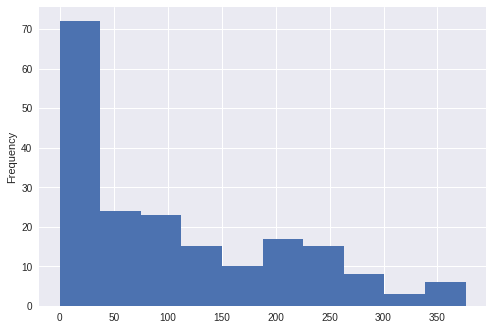

In [0]:
# compare with histogram: Now, put them in 10 bins
drinks.beer_servings.plot(kind='hist', bins=10)

**Each row in the dataframe represents a country. In above histogram, we take each country and put it in a bin. For example looking at value_counts below, we can tell that in the 2nd bin there are 24 countries that have beer_servings between (36.6 and 75.2) litres/year**

In [0]:
drinks.beer_servings.value_counts(bins=10)

(-0.377, 37.6]    72
(37.6, 75.2]      24
(75.2, 112.8]     23
(188.0, 225.6]    16
(225.6, 263.2]    15
(112.8, 150.4]    15
(150.4, 188.0]    11
(263.2, 300.8]     8
(338.4, 376.0]     6
(300.8, 338.4]     3
Name: beer_servings, dtype: int64

**Just based on above data, we can come to some conclusions about the distributions of beer_servings for countries**
- If we randomly pick a country, what is the probability that we pick a country that consumes more than 150 litres per person per year?
- If we randomly pick a country, what is the probability that we pick a country that consumes between 150-188 litres per person per year?

## STEP 3: Box Plots
- Box plots are an other way to look at the distribution of a single variable.
- Unlike histograms, each quadrant below has the same number of countries inside of it. Each quadrant has 1/4th the number of countries
- So you know the first quadrant is really dense. There are many countries in the same amount of range approx 0 - 20.

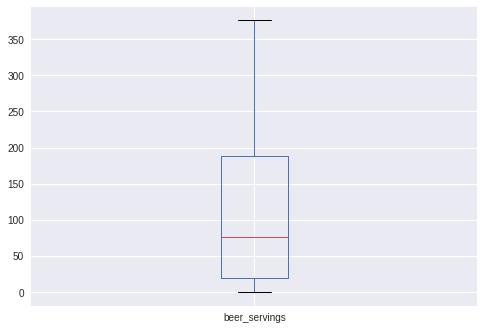

In [0]:
drinks.beer_servings.plot(kind='box')

## STEP 3: SCATTER PLOTS - Understand distributions across two variables


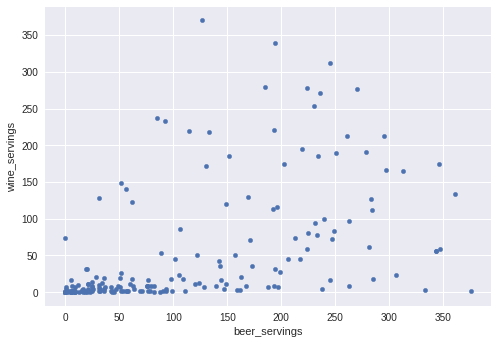

In [0]:
drinks.plot(kind="scatter", x = "beer_servings", y = "wine_servings")

The red line shows the median values. If you are to sort all the countries according to their "beer_servings", the country in the middle will have the "median value".

In [0]:
drinks.corr()["beer_servings"]["spirit_servings"]

0.45881887413938227

- **Scatter plots are great at looking at relationships between two variables. In above case, between beer_servings and spirit_servings**
- Each dot in above graph represents a country.
- So, if some one asks, overall, how well do these "beer_servings" and "spirit_servings" go up or down together, scatter plots are good way to eye ball that.
- Overall, we see that if the number of beer_servings for a country is large, their wine_servings also tends to be higher.



Now, if you want to look across multiple variables at the same time

In [0]:
drinks.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


Example Questions:
- If you randomly picked a country. What's the probability that the country's beer_servings is more than 200 per person per year?
- If you randomly pick a country, what is the probability that the country's wine_servings is less than 150 litres/person/year
- How well do the wine_servings and spirit_servings in Europe (EU) go up or down together. Can you give a number between -1 and +1 that can get the essense of this behavior

## Interactive Visualizations with Tableau

* Histograms, Box Plots and Scatter Plots form the foundation for understanding the distributions underlying the data. Once you understand the distributions, you can come to certain conclusions and communicate insights to the business stake holders, enabling them to make better decisions.

* While Python-Pandas-Matplotlib are great while doing exploratory work and sharing data and ideas among fellow programmers and Data Scientists, I found they are not very effective while communicating insights with senior leadership and managers.

* When you are in the same room as an executive, it is critical to be able to answer as many questions as possible in the same 15-20 session without scrolling up and down and dynamically programming. This is where Tableau comes in handy.

* To learn more about Visualizing Distributions with Tableau, [![Distributions with Tableau](https://github.com/viswanath-puttagunta/dswithpython/blob/master/week1/Tableau_Distributions.png?raw=true)](https://www.youtube.com/watch?v=KeoR1c9QO-w "Everything Is AWESOME")
